In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("C:\Users\aspire 3\Desktop\Term 3 Project\visualize.csv")

In [3]:
data.drop(data.columns[[0]], axis=1, inplace=True)

In [4]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Reached_on_time
0,D,Flight,4,2,177,3,low,F,44,1233,1,NO
1,F,Flight,4,5,216,2,low,M,59,3088,1,NO
2,A,Flight,2,2,183,4,low,M,48,3374,1,NO
3,B,Flight,3,3,176,4,medium,M,10,1177,1,NO
4,C,Flight,2,2,184,3,medium,F,46,2484,1,NO


In [5]:
#data=pd.get_dummies(data,columns=['Mode_of_Shipment','Product_importance','Gender','Customer_care_calls','Customer_rating',
                                  # 'Prior_purchases'])
data["customerscore"]=np.nan
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Reached_on_time,customerscore
0,D,Flight,4,2,177,3,low,F,44,1233,1,NO,NaN
1,F,Flight,4,5,216,2,low,M,59,3088,1,NO,NaN
2,A,Flight,2,2,183,4,low,M,48,3374,1,NO,NaN
3,B,Flight,3,3,176,4,medium,M,10,1177,1,NO,NaN
4,C,Flight,2,2,184,3,medium,F,46,2484,1,NO,NaN


In [6]:
good_rating=data.query('Customer_rating>=3')

In [7]:
print(good_rating)

      Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
1                   F           Flight                    4                5   
3                   B           Flight                    3                3   
6                   D           Flight                    3                4   
8                   A           Flight                    3                4   
10                  C           Flight                    3                4   
11                  F           Flight                    4                5   
12                  D           Flight                    3                5   
13                  F           Flight                    4                4   
14                  A           Flight                    4                3   
15                  B           Flight                    4                3   
16                  C           Flight                    3                4   
17                  F             Ship  

In [8]:
data['Reached_on_time'].value_counts(normalize=True) * 100

NO     59.669061
YES    40.330939
Name: Reached_on_time, dtype: float64

In [9]:
#

NO     3977
YES    2622
Name: Reached_on_time, dtype: int64


NO     60.266707
YES    39.733293
Name: Reached_on_time, dtype: float64

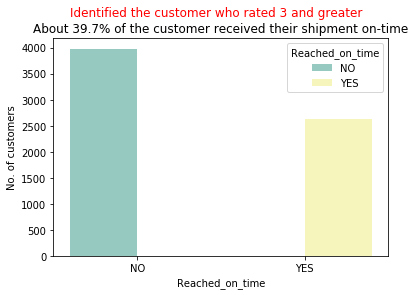

In [160]:
import seaborn as sns
ax =sns.countplot(x="Reached_on_time",data=good_rating, palette="Set3",hue="Reached_on_time")
plt.ylabel("No. of customers")
plt.title("About 39.7% of the customer received their shipment on-time")
#plt.title("Identified the customer who rated 3")
ax.text(-0.4, 4600, 'Identified the customer who rated 3 and greater',fontsize=12,color='red')

count=good_rating['Reached_on_time'].value_counts()
print(count)
#ax.text(0, 4600, count,fontsize=12,horizontalalignment='center')
good_rating['Reached_on_time'].value_counts(normalize=True)*100

In [19]:
totalcost = data['Cost_of_the_Product'].sum()
print (totalcost)

2311955


In [20]:
countorder=data['Cost_of_the_Product'].count()
print(countorder)

10999


In [21]:
avg=totalcost/countorder
print(avg)

210.19683607600692


In [22]:
a=[]
for value in data['Prior_purchases']: 
    a.append(avg*value)
data['customerscore']=a
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Reached_on_time,customerscore
0,D,Flight,4,2,177,3,low,F,44,1233,1,NO,630.590508
1,F,Flight,4,5,216,2,low,M,59,3088,1,NO,420.393672
2,A,Flight,2,2,183,4,low,M,48,3374,1,NO,840.787344
3,B,Flight,3,3,176,4,medium,M,10,1177,1,NO,840.787344
4,C,Flight,2,2,184,3,medium,F,46,2484,1,NO,630.590508


In [38]:
data['customerscore'].median()

630.5905082280208

In [24]:
goodscore=data.query('customerscore>=630')

In [25]:
#yes=goodscore.query('Reached_on_time==YES').counts()

NO     4938
YES    3462
Name: Reached_on_time, dtype: int64


NO     58.785714
YES    41.214286
Name: Reached_on_time, dtype: float64

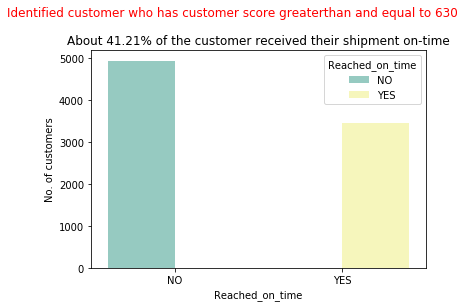

In [145]:
ax = sns.countplot(x="Reached_on_time",data=goodscore, palette="Set3",hue="Reached_on_time")
plt.ylabel("No. of customers")
plt.title("About 41.21% of the customer received their shipment on-time")
#plt.title("Identified the customer who rated 3")
ax.text(-1, 6000, 'Identified customer who has customer score greaterthan and equal to 630',fontsize=12,color='red')
count1=goodscore['Reached_on_time'].value_counts()
print(count1)
goodscore['Reached_on_time'].value_counts(normalize=True)*100

In [100]:
recurringorder=data.query('Prior_purchases>=6')
recurringorder

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Reached_on_time,customerscore
37,F,Ship,2,4,181,6,medium,F,16,3605,1,NO,1261.181016
62,A,Ship,5,1,105,6,medium,M,62,1292,1,NO,1261.181016
74,A,Ship,6,1,238,6,low,F,13,2442,1,NO,1261.181016
90,D,Ship,5,3,174,6,high,F,41,1085,1,NO,1261.181016
133,F,Flight,5,4,280,6,medium,F,51,3582,1,NO,1261.181016
180,D,Ship,4,1,161,7,medium,F,18,1294,1,NO,1471.377853
182,A,Ship,3,2,164,10,high,F,28,1940,1,NO,2101.968361
183,B,Ship,3,5,162,7,medium,F,16,1052,1,NO,1471.377853
226,C,Ship,4,3,161,7,medium,M,63,1496,1,NO,1471.377853
228,D,Ship,3,2,164,10,high,M,14,1375,1,NO,2101.968361


NO     591
YES    412
Name: Reached_on_time, dtype: int64


NO     58.92323
YES    41.07677
Name: Reached_on_time, dtype: float64

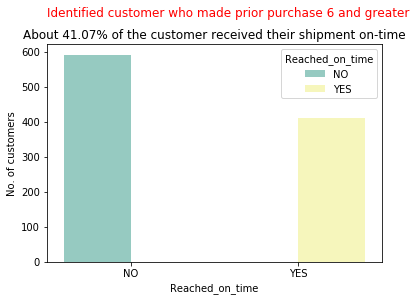

In [161]:
ax = sns.countplot(x="Reached_on_time",data=recurringorder, palette="Set3",hue="Reached_on_time")
plt.ylabel("No. of customers")
plt.title("About 41.07% of the customer received their shipment on-time")
#plt.title("Identified the customer who rated 3")
ax.text(-0.5, 700, 'Identified customer who made prior purchase 6 and greater',fontsize=12,color='red')
count2=recurringorder['Reached_on_time'].value_counts()
print(count2)
recurringorder['Reached_on_time'].value_counts(normalize=True)*100

In [119]:
data["Cost_of_the_Product"].max()

310

In [120]:
data["Cost_of_the_Product"].min()

96

In [121]:
medianvalue=data["Cost_of_the_Product"].median()

In [122]:
print(medianvalue)

214.0


In [123]:
higestpayment=data.query('Cost_of_the_Product>=214')

NO     3136
YES    2408
Name: Reached_on_time, dtype: int64


NO     56.565657
YES    43.434343
Name: Reached_on_time, dtype: float64

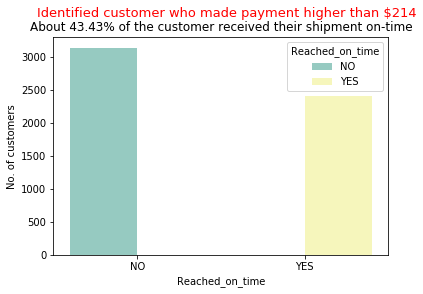

In [149]:
ax = sns.countplot(x="Reached_on_time",data=higestpayment, palette="Set3",hue="Reached_on_time")
plt.ylabel("No. of customers")
plt.title("About 43.43% of the customer received their shipment on-time")
#plt.title("Identified the customer who rated 3")
ax.text(-0.6, 3600, 'Identified customer who made payment higher than $214',fontsize=13,color='red')
count3=higestpayment['Reached_on_time'].value_counts()
print(count3)
higestpayment['Reached_on_time'].value_counts(normalize=True)*100

In [138]:
mostvaluablecustomer=data[(data['Customer_rating'] >= 3)&(data['Prior_purchases']>=6)&(data['Cost_of_the_Product']>=214)&(data['customerscore']>=data['customerscore'].median())]

NO     172
YES    156
Name: Reached_on_time, dtype: int64


NO     52.439024
YES    47.560976
Name: Reached_on_time, dtype: float64

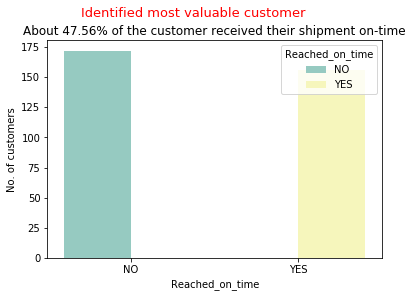

In [153]:
ax = sns.countplot(x="Reached_on_time",data=mostvaluablecustomer, palette="Set3",hue="Reached_on_time")
plt.ylabel("No. of customers")
plt.title("About 47.56% of the customer received their shipment on-time")
#plt.title("Identified the customer who rated 3")
ax.text(-0.3, 200, 'Identified most valuable customer',fontsize=13,color='red')
count4=mostvaluablecustomer['Reached_on_time'].value_counts()
print(count4)
mostvaluablecustomer['Reached_on_time'].value_counts(normalize=True)*100

In [191]:
#

In [192]:
#